In [113]:
# Before running these commands, create a virtual environment (outside project directory) using python -m venv "dir_name/env_name"
%pip install deepxde
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
%pip install chart-studio
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
geo = dde.geometry.Interval(-1, 1)
T = 0.5
def dU(x):
    print((4*(x**2 - 1)*(x)).shape)
    return 4*(x**2 - 1)*(x)

def committor(x, q):
    dq_x = dde.gradients.jacobian(q, x)
    dlap_q = dde.gradients.hessian(q, x, i=0, j=0)
    grad_U = dU(x)
    beta = 1 / T
    return -1/beta * dlap_q + grad_U * dq_x


bc_a = dde.icbc.DirichletBC(geo, lambda x: 0.0, lambda x, on_boundary: on_boundary and np.isclose(x[0], -1))
bc_b = dde.icbc.DirichletBC(geo, lambda x: 1.0, lambda x, on_boundary: on_boundary and np.isclose(x[0], 1))


In [8]:
data = dde.data.pde.TimePDE(
    geo,
    committor, 
    [bc_a, bc_b], 
    num_domain=1000,
    num_boundary=2,
    num_test=500
)

In [10]:
net = dde.maps.FNN([1] + [64] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=2000)

Compiling model...
Building feed-forward neural network...
'build' took 0.132497 s

(None, 1)
(None, 1)
'compile' took 0.611312 s

Training model...

0         [2.06e-02, 2.02e-02, 7.36e-01]    [2.06e-02, 2.02e-02, 7.36e-01]    []  
1000      [6.02e-05, 3.70e-05, 4.28e-05]    [5.92e-05, 3.70e-05, 4.28e-05]    []  
2000      [2.03e-05, 8.32e-07, 6.06e-07]    [1.92e-05, 8.32e-07, 6.06e-07]    []  

Best model at step 2000:
  train loss: 2.18e-05
  test loss: 2.06e-05
  test metric: []

'train' took 14.746037 s



In [11]:
model.compile("L-BFGS-B")
losshistory, train_state=model.train()

Compiling model...
(None, 1)
(None, 1)
'compile' took 0.279323 s

Training model...

Step      Train loss                        Test loss                         Test metric
2000      [2.03e-05, 8.32e-07, 6.06e-07]    [1.92e-05, 8.32e-07, 6.06e-07]    []  

INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  Objective function value: 0.000022
  Number of iterations: 1
  Number of functions evaluations: 31
2017      [2.03e-05, 8.32e-07, 6.06e-07]    [1.92e-05, 8.32e-07, 6.06e-07]    []  

Best model at step 2000:
  train loss: 2.18e-05
  test loss: 2.06e-05
  test metric: []

'train' took 0.929902 s



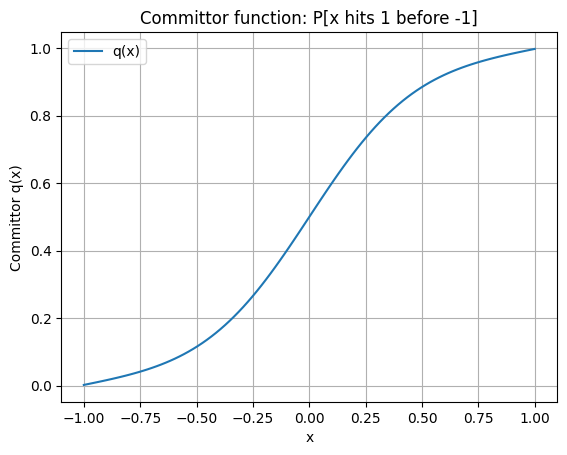

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

x = np.linspace(-1, 1, 100).reshape(-1, 1)
u_pred = model.predict(x)

plt.plot(x, u_pred, label="q(x)")
plt.xlabel("x")
plt.ylabel("Committor q(x)")
plt.title("Committor function: P[x hits 1 before -1]")
plt.grid(True)
plt.legend()
plt.show()
# OK plan stay up and look into this like there is no tomorrow